# Importing Libraries and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataframe1 = pd.read_csv("adult.txt")
dataframe1.to_csv('adult.csv',index= None)

In [3]:
#dataframe1.set_axis(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_stat', 'occupation',
#'realtionship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', '<=50K'], axis=1, inplace=True)


In [146]:
dataframe1=pd.read_csv('adult.csv', na_values='?')
dataframe1

,age,workclass,fnlwgt,education,education_num,marital_stat,occupation,realtionship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
dataframe1.columns = dataframe1.columns.str.strip()

In [6]:
print(list(dataframe1.columns))

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_stat', 'occupation', 'realtionship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


# Data Analysis

## Missing Values

<AxesSubplot:>

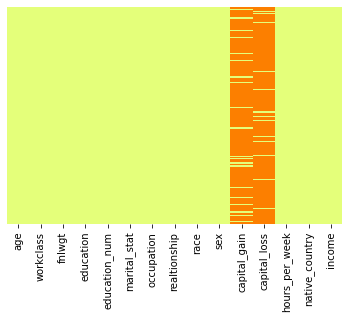

In [7]:
sns.heatmap(dataframe1.isin([0]), yticklabels=False, cbar=False, cmap='Wistia')

In [8]:
dataframe1.isin([0]).any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_stat      False
occupation        False
realtionship      False
race              False
sex               False
capital_gain       True
capital_loss       True
hours_per_week    False
native_country    False
income            False
dtype: bool

In [9]:
#check percentage of null values in remaining variables

nan_feature= [feature for feature in dataframe1.columns if dataframe1[feature].isin([0]).any().sum()>0]
nan_feature
for feature in nan_feature:
    print(feature, np.round((dataframe1[feature]==0).mean(), 4), 'missing values')

capital_gain 0.9167 missing values
capital_loss 0.9533 missing values


Since both these variables have a lot of missing values i.e more than 90% we first check their corrleation with our dependent variable 'income' and decide whether to drop or fill them.

But first we convert 'income' column to 0's and 1's using Label Encoder.

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataframe1['income'] = label_encoder.fit_transform(dataframe1['income'])
dataframe1['income'].unique()

array([0, 1])

## Correlation heatmap

<AxesSubplot:>

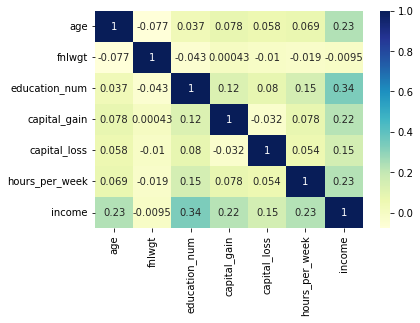

In [11]:
sns.heatmap(dataframe1.corr(), cmap='YlGnBu', annot=True)

The variables have very small to insignificant correlation with each other and we can see that 'capital_gain' and 'capital_loss' creates very less correlation with 'income'. Hence we drop them.
Also we see that 'fnlwgt' ie sampling weight has the least correlation, we drop it too.

In [12]:
dataframe1.drop(['capital_gain', 'capital_loss', 'fnlwgt'], axis=1, inplace=True)
dataframe1

,age,workclass,education,education_num,marital_stat,occupation,realtionship,race,sex,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


## Numerical Variables

In [13]:
num_var= [feature for feature in dataframe1.columns if dataframe1[feature].dtypes!='O' ]
num_var

['age', 'education_num', 'hours_per_week', 'income']

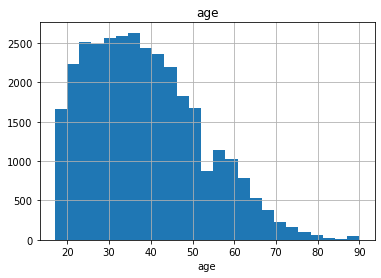

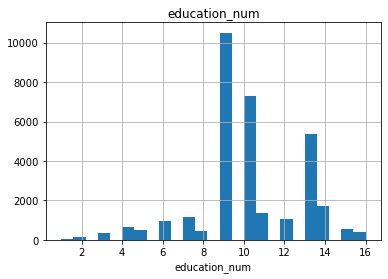

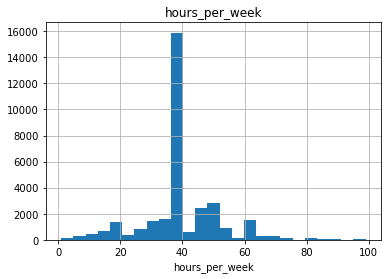

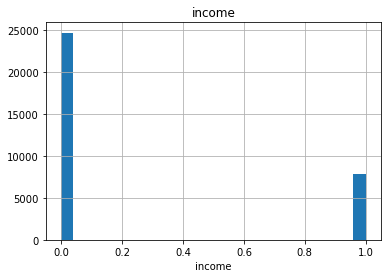

In [14]:
for feature in num_var:
    data=dataframe1.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()
    

In [15]:
for feature in num_var:
    print(feature, dataframe1[feature].value_counts())

age 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
education_num 9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64
hours_per_week 40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours_per_week, Length: 94, dtype: int64
income 0    24720
1     7841
Name: income, dtype: int64


## Categorical Variables

In [16]:
cat_var= [feature for feature in dataframe1.columns if dataframe1[feature].dtypes == 'O']
print('Categorical Variable: {}'.format(len(cat_var)))
cat_var

Categorical Variable: 8


['workclass',
 'education',
 'marital_stat',
 'occupation',
 'realtionship',
 'race',
 'sex',
 'native_country']

In [17]:
for feature in cat_var:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataframe1[feature].unique())))

The feature is workclass and number of categories are 9
The feature is education and number of categories are 16
The feature is marital_stat and number of categories are 7
The feature is occupation and number of categories are 15
The feature is realtionship and number of categories are 6
The feature is race and number of categories are 5
The feature is sex and number of categories are 2
The feature is native_country and number of categories are 42


In [18]:
for feature in cat_var:
    print(feature, dataframe1[feature].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_stat [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
realtionship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native_country [' United-States' ' Cuba' ' Jamaica' ' India' ' ?

In [19]:
#handling missing values in categorrical variables- workclass, occupation, native_country
#replacing all special characters '?' with Nan
dataframe1= dataframe1.replace({'\?': np.nan}, regex=True)
dataframe1.head(15)


,age,workclass,education,education_num,marital_stat,occupation,realtionship,race,sex,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


<AxesSubplot:>

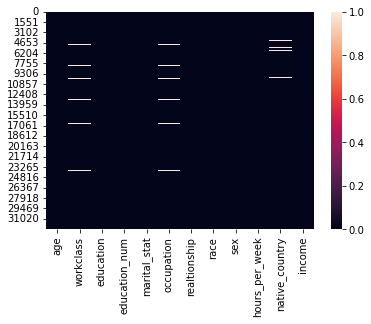

In [20]:
sns.heatmap(dataframe1.isnull())

In [21]:
#percentage nan values in 'workclass'
dataframe1['workclass'].isnull().mean()*100

5.638647461687294

Hence we notice that there are 5.6% missing values in the workclass column. So we will fill these values by its mode

In [22]:
#filling nan values in 'workclass'
dataframe1['workclass'].mode()  #---- 'Private'
dataframe1['workclass'].fillna('Private', inplace=True)
dataframe1['workclass'].isna().sum()

0

In [23]:
#percentage nan values in 'occupation'
dataframe1['occupation'].isnull().mean()*100

5.660145572924664

Hence we notice that there are 5.6% missing values in the occupation column. So we will fill these values by its mode

In [24]:
#filling nan values in 'occupation'
dataframe1['occupation'].mode()  #---- 'Prof-specialty'
dataframe1['occupation'].fillna('Prof-specialty', inplace=True)
dataframe1['occupation'].isna().sum()

0

In [25]:
#creating new column 'continent' with respective continents
 
asia=[' India', ' Iran', ' Philippines', ' Cambodia', ' Thailand', ' Laos',' Taiwan',  ' China', ' Japan', ' Vietnam', ' Hong']
europe=[' England', ' Germany', ' Italy', ' Poland' , ' Portugal', ' France', ' Yugoslavia', ' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands']
america=[' United-States', ' Cuba',' Jamaica', ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' Canada', ' Columbia', ' Ecuador', ' Haiti', ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Trinadad&Tobago', ' Nicaragua' ]


def GetConti(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in america:
        return "America"
    else:
        return np.nan


dataframe1['continent'] = dataframe1['native_country'].apply(lambda x: GetConti(x))
print(dataframe1)

       age          workclass    education  education_num  \
0       39          State-gov    Bachelors             13   
1       50   Self-emp-not-inc    Bachelors             13   
2       38            Private      HS-grad              9   
3       53            Private         11th              7   
4       28            Private    Bachelors             13   
...    ...                ...          ...            ...   
32556   27            Private   Assoc-acdm             12   
32557   40            Private      HS-grad              9   
32558   58            Private      HS-grad              9   
32559   22            Private      HS-grad              9   
32560   52       Self-emp-inc      HS-grad              9   

              marital_stat          occupation    realtionship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaner

Since we created a new column which represents the continent the individual belongs to, we can drop the 'native_country' column

In [26]:
dataframe1.drop(['native_country'], axis=1, inplace=True)
dataframe1.head(15)

,age,workclass,education,education_num,marital_stat,occupation,realtionship,race,sex,hours_per_week,income,continent
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0,America
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0,America
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0,America
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0,America
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0,America
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0,America
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,0,America
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,1,America
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,1,America
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,1,America


<AxesSubplot:xlabel='continent', ylabel='count'>

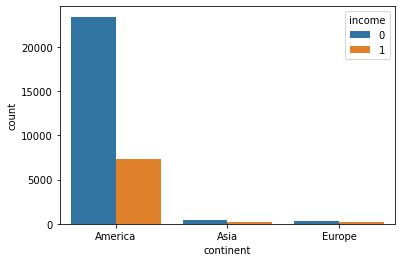

In [27]:
sns.countplot(x='continent', data=dataframe1, hue='income')

In [28]:
#percentage nan values in 'continent'
dataframe1['continent'].isnull().mean()*100

1.7904855501980899

Hence we notice that there are 1.7% missing values in the continents column. So we will fill these values by its mode.

In [29]:
#filling nan values in 'continent'
dataframe1['continent'].mode()  #---- 'America'
dataframe1['continent'].fillna('America', inplace=True)
dataframe1['continent'].isna().sum()

0

<AxesSubplot:>

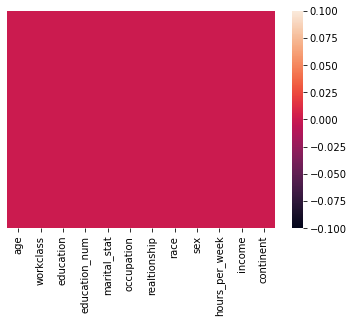

In [30]:
sns.heatmap(dataframe1.isnull(), yticklabels=False)

## Removing Redundant Variable- 'education'

The variable 'education' and 'education_num' indicate the same thing that is- the type of education an individual has received. Being redundant we remove the less necessary one i.e 'education'.

In [31]:
dataframe1.drop(['education'], axis=1, inplace=True)
dataframe1

,age,workclass,education_num,marital_stat,occupation,realtionship,race,sex,hours_per_week,income,continent
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0,America
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0,America
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0,America
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0,America
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0,America
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,0,America
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1,America
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,0,America
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,0,America


<AxesSubplot:xlabel='income'>

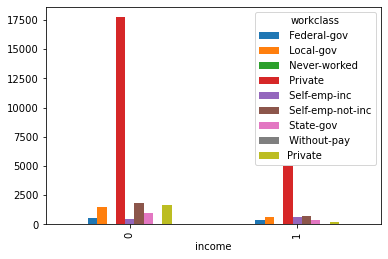

In [32]:
salary=pd.crosstab(dataframe1['income'],dataframe1['workclass'])
salary.plot(kind='bar')


In [33]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education_num   32561 non-null  int64 
 3   marital_stat    32561 non-null  object
 4   occupation      32561 non-null  object
 5   realtionship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours_per_week  32561 non-null  int64 
 9   income          32561 non-null  int32 
 10  continent       32561 non-null  object
dtypes: int32(1), int64(3), object(7)
memory usage: 2.6+ MB


# Feature Scaling

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for col in dataframe1.columns:
    if dataframe1[col].dtype=='O':
        dataframe1[col]=encoder.fit_transform(dataframe1[col])
    else:
        pass
    

In [35]:
feature_scale=[feature for feature in dataframe1.columns if feature not in ['income']]

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit_transform(dataframe1[feature_scale])

array([[0.30136986, 0.75      , 0.8       , ..., 1.        , 0.39795918,
        0.        ],
       [0.45205479, 0.625     , 0.8       , ..., 1.        , 0.12244898,
        0.        ],
       [0.28767123, 0.375     , 0.53333333, ..., 1.        , 0.39795918,
        0.        ],
       ...,
       [0.56164384, 0.375     , 0.53333333, ..., 0.        , 0.39795918,
        0.        ],
       [0.06849315, 0.375     , 0.53333333, ..., 1.        , 0.19387755,
        0.        ],
       [0.47945205, 0.5       , 0.53333333, ..., 0.        , 0.39795918,
        0.        ]])

In [36]:
data = pd.concat([dataframe1[['income']].reset_index(drop=True),
                 pd.DataFrame(scaler.transform(dataframe1[feature_scale]),columns=feature_scale)],
                axis=1)

In [37]:
data.head(10)

,income,age,workclass,education_num,marital_stat,occupation,realtionship,race,sex,hours_per_week,continent
0,0,0.301370,0.750,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.397959,0.0
1,0,0.452055,0.625,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.122449,0.0
2,0,0.287671,0.375,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.397959,0.0
3,0,0.493151,0.375,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.397959,0.0
4,0,0.150685,0.375,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.397959,0.0
5,0,0.273973,0.375,0.866667,0.333333,0.214286,1.0,1.0,0.0,0.397959,0.0
6,0,0.438356,0.375,0.266667,0.500000,0.500000,0.2,0.5,0.0,0.153061,0.0
7,1,0.479452,0.625,0.533333,0.333333,0.214286,0.0,1.0,1.0,0.448980,0.0
8,1,0.191781,0.375,0.866667,0.666667,0.642857,0.2,1.0,0.0,0.500000,0.0
9,1,0.342466,0.375,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.397959,0.0


# Feature Selection

In [38]:
x= data.iloc[:, 1:11]
x

,age,workclass,education_num,marital_stat,occupation,realtionship,race,sex,hours_per_week,continent
0,0.301370,0.750,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.397959,0.0
1,0.452055,0.625,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.122449,0.0
2,0.287671,0.375,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.397959,0.0
3,0.493151,0.375,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.397959,0.0
4,0.150685,0.375,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.397959,0.0
...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.375,0.733333,0.333333,0.857143,1.0,1.0,0.0,0.377551,0.0
32557,0.315068,0.375,0.533333,0.333333,0.428571,0.0,1.0,1.0,0.397959,0.0
32558,0.561644,0.375,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.397959,0.0
32559,0.068493,0.375,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.193878,0.0


In [39]:
y=data['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

# Data Modelling

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#train test split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state=42)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logmod= LogisticRegression()

In [43]:
logmod.fit(x_train, y_train)

LogisticRegression()

In [44]:
#prediction
predict1=logmod.predict(x_test)

In [45]:
logmod.score(x_train, y_train) 

0.8049965619986248

In [46]:
from sklearn.metrics import accuracy_score
x1=accuracy_score(y_test, predict1)
x1

0.8070910106085986

## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [48]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
#prediction
predict2=rfc.predict(x_test)

In [50]:
x2=accuracy_score(y_test, predict2)

## Guassian Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [52]:
nb.fit(x_train, y_train)

GaussianNB()

In [53]:
#prediction
predict3=nb.predict(x_test)

In [54]:
x3=accuracy_score(y_test, predict3)

## Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [56]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
#prediction
predict4=dtc.predict(x_test)

In [58]:
x4=accuracy_score(y_test, predict4)


## Performance Comparision

In [151]:
model_score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Class','Gaussian Naive Bayes','Descision Tree Class'],
                            "Accuracy_score":[x1, x2, x3, x4]})
model_score.set_index('Model', inplace=True)
model_score.sort_values(by='Accuracy_score', ascending=False)

,Accuracy_score
Model,
Random Forest Class,0.818444
Logistic Regression,0.807091
Gaussian Naive Bayes,0.786060
Descision Tree Class,0.774893


Hence we see that Random Forest Classifier performs the best to predict values with an accuracy of **81.84%** 

# Cleaning Test Data

In [99]:
test=pd.read_csv('adult.test')
test.columns = test.columns.str.strip()
test

,age,workclass,fnlwgt,education,education_num,marital_stat,occupation,realtionship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [100]:
#replacing all special characters '?' with Nan
test= test.replace({'\?': np.nan}, regex=True)


In [101]:
#removing the columns 'capital_loss', 'capital_gain', 'fnlwgt' and 'education'

test.drop(['education', 'capital_loss', 'capital_gain', 'fnlwgt' ], axis=1, inplace=True)
test.head(15)

,age,workclass,education_num,marital_stat,occupation,realtionship,race,sex,hours_per_week,native_country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K.
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,NaN,9,Never-married,NaN,Unmarried,Black,Male,40,United-States,<=50K.
7,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,Private,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,Private,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


In [102]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test['income'] = label_encoder.fit_transform(test['income'])
test['income'].unique()


array([0, 1])

In [157]:
#test_income=test.income
test_income.value_counts()
#test.drop('income', axis=1, inplace=True)

0    12435
1     3846
Name: income, dtype: int64

In [104]:
#creating new column 'continent' with respective continents
 
asia=[' India', ' Iran', ' Philippines', ' Cambodia', ' Thailand', ' Laos',' Taiwan',  ' China', ' Japan', ' Vietnam', ' Hong']
europe=[' England', ' Germany', ' Italy', ' Poland' , ' Portugal', ' France', ' Yugoslavia', ' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands']
america=[' United-States', ' Cuba',' Jamaica', ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' Canada', ' Columbia', ' Ecuador', ' Haiti', ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Trinadad&Tobago', ' Nicaragua' ]


def GetConti(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in america:
        return "America"
    else:
        return np.nan


test['continent'] = test['native_country'].apply(lambda x: GetConti(x))
print(test)

       age      workclass  education_num         marital_stat  \
0       25        Private              7        Never-married   
1       38        Private              9   Married-civ-spouse   
2       28      Local-gov             12   Married-civ-spouse   
3       44        Private             10   Married-civ-spouse   
4       18            NaN             10        Never-married   
...    ...            ...            ...                  ...   
16276   39        Private             13             Divorced   
16277   64            NaN              9              Widowed   
16278   38        Private             13   Married-civ-spouse   
16279   44        Private             13             Divorced   
16280   35   Self-emp-inc             13   Married-civ-spouse   

               occupation     realtionship                 race      sex  \
0       Machine-op-inspct        Own-child                Black     Male   
1         Farming-fishing          Husband                White    

In [105]:
#removing 'native_country'
test.drop(['native_country'], axis=1, inplace=True)


<AxesSubplot:>

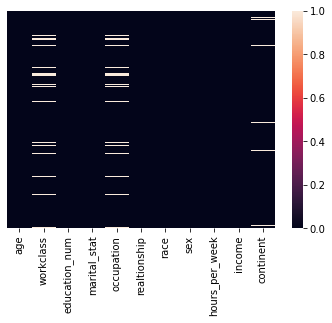

In [106]:
#missing values
sns.heatmap(test.isna(), yticklabels=False)

In [108]:
#filling missing values with mode
test['occupation'].fillna('Prof-specialty', inplace=True)
test['continent'].fillna('America', inplace=True)
test['workclass'].fillna('Private', inplace=True)


In [109]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for col in dataframe1.columns:
    if test[col].dtype=='O':
        test[col]=encoder.fit_transform(test[col])
    else:
        pass

In [110]:
feature_scale=[feature for feature in test.columns]

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit_transform(test[feature_scale])

array([[0.10958904, 0.375     , 0.4       , ..., 0.39795918, 0.        ,
        0.        ],
       [0.28767123, 0.375     , 0.53333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.15068493, 0.125     , 0.73333333, ..., 0.39795918, 1.        ,
        0.        ],
       ...,
       [0.28767123, 0.375     , 0.8       , ..., 0.5       , 0.        ,
        0.        ],
       [0.36986301, 0.375     , 0.8       , ..., 0.39795918, 0.        ,
        0.        ],
       [0.24657534, 0.5       , 0.8       , ..., 0.60204082, 1.        ,
        0.        ]])

In [112]:
Xtrain=data.iloc[:, 1:11]
Ytrain=data['income']

In [152]:
rfc.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [131]:
Xtest=test
Xtest

,age,workclass,education_num,marital_stat,occupation,realtionship,race,sex,hours_per_week,continent
0,25,3,7,4,6,3,2,1,40,0
1,38,3,9,2,4,0,4,1,50,0
2,28,1,12,2,10,0,4,1,40,0
3,44,3,10,2,6,0,2,1,40,0
4,18,8,10,4,14,3,4,0,30,0
...,...,...,...,...,...,...,...,...,...,...
16276,39,3,13,0,9,1,4,0,36,0
16277,64,8,9,6,14,2,2,1,40,0
16278,38,3,13,2,9,0,4,1,50,0
16279,44,3,13,0,0,3,1,1,40,0


In [163]:
predict_rfc=rfc.predict(Xtest)

In [164]:
final=pd.DataFrame(predict_rfc)
final

,0
0,1
1,1
2,1
3,1
4,1
...,...
16276,0
16277,1
16278,1
16279,1
